In [79]:
import pandas as pd 
import numpy as np 


In [ ]:
df = pd.read_csv('E:\walmart sales forecast\indian_retail_sales_data.csv')


<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\anshs\AppData\Local\Temp\ipykernel_40692\1822069752.py:1: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv('E:\walmart sales forecast\indore_warehouse_sales.csv')


In [120]:
df.head()

,date,product_id,product_name,category,inventory,units_sold,city
0,2025-05-14,P001,AC - Voltas 1.5T,Electronics,70,26,Indore
1,2025-05-14,P002,Ceiling Fan - Havells,Electronics,62,23,Indore
2,2025-05-14,P003,Smartphone - Realme Narzo,Mobiles,86,74,Indore
3,2025-05-14,P004,Rice - India Gate Basmati,Grocery,100,97,Indore
4,2025-05-14,P005,Wheat Flour - Aashirvaad,Grocery,172,12,Indore


In [ ]:
df.describe()

,inventory,units_sold
count,1200.000000,1200.000000
mean,123.721667,54.793333
std,43.208487,26.604896
min,50.000000,10.000000
25%,87.000000,32.000000
50%,124.000000,54.000000
75%,159.000000,79.000000
max,200.000000,100.000000


In [122]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1200 non-null   object
 1   product_id    1200 non-null   object
 2   product_name  1200 non-null   object
 3   category      1200 non-null   object
 4   inventory     1200 non-null   int64 
 5   units_sold    1200 non-null   int64 
 6   city          1200 non-null   object
dtypes: int64(2), object(5)
memory usage: 65.8+ KB


(1200, 7)

In [123]:
df.isnull().sum()

date            0
product_id      0
product_name    0
category        0
inventory       0
units_sold      0
city            0
dtype: int64

In [124]:
# converting date format into datetime format 

df['date'] = pd.to_datetime(df['date'])

In [125]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['region_encoded'] = le.fit_transform(df['region'])
df['store_encoded'] = le.fit_transform(df['store_id'])
df['product_encoded'] = le.fit_transform(df['product_id'])
df['category_encoded'] = le.fit_transform(df['category'])

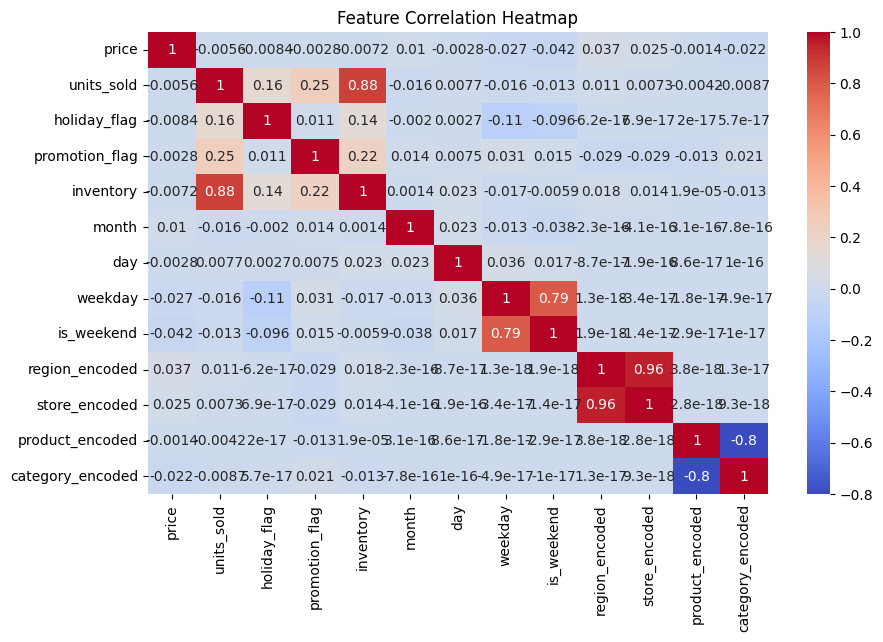

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [90]:
df['region_encoded']

0       1
1       1
2       1
3       1
4       1
       ..
2755    2
2756    2
2757    2
2758    2
2759    2
Name: region_encoded, Length: 2760, dtype: int64

In [91]:
# including all the numeric and the encoded columns in the input 

feature_cols = [
    'region_encoded',
    'store_encoded',
    'product_encoded',
    'category_encoded',
    'price',
    'promotion_flag',
    'holiday_flag',
    'inventory',
    'month',
    'weekday',
    'is_weekend'
]

X=df[feature_cols]

In [92]:
y =df['units_sold']

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [94]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)


print(f"MAE: {mae:.2f}")


MAE: 19.36


In [96]:
'''
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb:.2f}")
'''


'\nimport xgboost as xgb\n\nxgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)\nxgb_model.fit(X_train, y_train)\n\ny_pred_xgb = xgb_model.predict(X_test)\n\nmae_xgb = mean_absolute_error(y_test, y_pred_xgb)\nprint(f"XGBoost MAE: {mae_xgb:.2f}")\n'

In [97]:
%pip install pytrends

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [98]:
# adding google api for analyding the trend

from pytrends.request import TrendReq
import pandas as pd

# Setup pytrends
pytrends = TrendReq(hl='en-IN', tz=330)

# Define keywords for each product
product_keywords = {
    'P001': 'Fair and Lovely',
    'P002': 'Parle G',
    'P003': 'Samsung Phone',
    'P004': 'Bisleri Water',
    'P005': 'Harpic Toilet Cleaner'
}

# Define regions (Google Trends uses geo codes)
region_map = {
    'Delhi': 'IN-DL',
    'Mumbai': 'IN-MH',
    'Indore': 'IN-MP'
}

# Define timeframe
timeframe = '2024-06-01 2024-08-31'


In [100]:
trend_data = []

for product_id, keyword in product_keywords.items():
    for region, geo_code in region_map.items():
        pytrends.build_payload(kw_list=[keyword], geo=geo_code, timeframe=timeframe)
        interest_df = pytrends.interest_over_time().reset_index()
        
        if not interest_df.empty:
            interest_df['product_id'] = product_id
            interest_df['region'] = region
            interest_df.rename(columns={keyword: 'trend_score'}, inplace=True)
            trend_data.append(interest_df[['date', 'region', 'product_id', 'trend_score']])


In [101]:
trend_df = pd.concat(trend_data)
trend_df['date'] = pd.to_datetime(trend_df['date'])
trend_df.head()


,date,region,product_id,trend_score
0,2024-06-01,Mumbai,P001,0
1,2024-06-02,Mumbai,P001,0
2,2024-06-03,Mumbai,P001,0
3,2024-06-04,Mumbai,P001,0
4,2024-06-05,Mumbai,P001,0


In [102]:
df['date'] = pd.to_datetime(df['date'])

df = df.merge(trend_df, on=['date', 'region', 'product_id'], how='left')


In [103]:
df['trend_score'] = df['trend_score'].fillna(method='ffill')  # or fill with 50


C:\Users\anshs\AppData\Local\Temp\ipykernel_40692\1116432901.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['trend_score'] = df['trend_score'].fillna(method='ffill')  # or fill with 50


In [104]:
feature_cols.append('trend_score')


In [105]:
df[['date', 'region', 'product_id', 'trend_score']].head()


,date,region,product_id,trend_score
0,2024-06-01,Indore,P001,NaN
1,2024-06-01,Indore,P002,0.0
2,2024-06-01,Indore,P003,54.0
3,2024-06-01,Indore,P004,54.0
4,2024-06-01,Indore,P005,0.0


In [106]:
feature_cols = [
    'region_encoded',
    'store_encoded',
    'product_encoded',
    'category_encoded',
    'price',
    'promotion_flag',
    'holiday_flag',
    'inventory',
    'month',
    'weekday',
    'is_weekend',
    'trend_score'   # 💡 New Feature
]

X = df[feature_cols]
y = df['units_sold']


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [108]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [109]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [110]:
from sklearn.metrics import mean_absolute_error

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)


print(f"MAE: {mae:.2f}")



MAE: 20.27


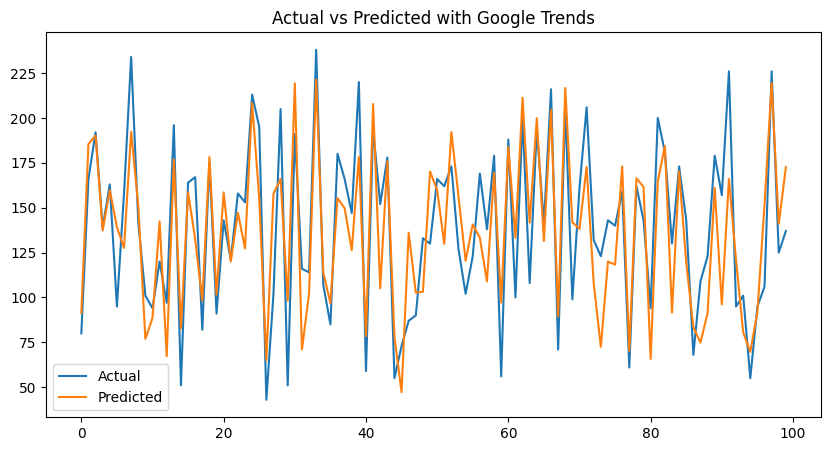

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted with Google Trends")
plt.show()


In [112]:
# the time in which the products comes back 
lead_time_days = 3
# buffer stock          
safety_stock = 30           


In [113]:
X_test = X_test.copy()  # to avoid modifying original
X_test['predicted_units_sold'] = y_pred


In [114]:
X_test['inventory'] = df.loc[X_test.index, 'inventory'].values
X_test['region'] = df.loc[X_test.index, 'region'].values
X_test['product_id'] = df.loc[X_test.index, 'product_id'].values


In [115]:
X_test['restock_flag'] = X_test.apply(
    lambda row: 1 if row['inventory'] < (row['predicted_units_sold'] * lead_time_days + safety_stock) else 0,
    axis=1
)

X_test['restock_qty'] = X_test.apply(
    lambda row: max(0, int((row['predicted_units_sold'] * lead_time_days + safety_stock - row['inventory'])))
    if row['restock_flag'] == 1 else 0,
    axis=1
)


In [116]:
X_test[['product_id', 'region', 'inventory', 'predicted_units_sold', 'restock_flag', 'restock_qty']].head(10)


,product_id,region,inventory,predicted_units_sold,restock_flag,restock_qty
367,P003,Indore,141,91.464546,1,163
1293,P004,Indore,253,185.502136,1,333
2106,P002,Indore,267,190.203629,1,333
2330,P001,Mumbai,187,137.286865,1,254
521,P002,Delhi,223,159.763138,1,286
817,P003,Indore,179,139.249725,1,268
322,P003,Mumbai,176,127.595154,1,236
1628,P004,Indore,250,192.343933,1,357
365,P001,Indore,196,151.269363,1,287
2553,P004,Indore,111,76.880768,1,149


In [117]:
X_test.to_csv("restock_alerts.csv", index=False)


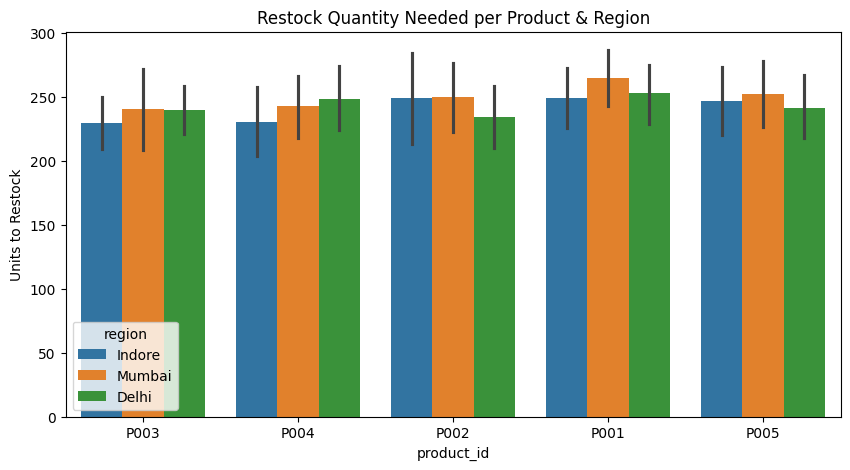

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x='product_id', y='restock_qty', hue='region', data=X_test[X_test['restock_flag'] == 1])
plt.title('Restock Quantity Needed per Product & Region')
plt.ylabel('Units to Restock')
plt.show()
